NAME : Alviya Ali 
PRN : 24070243005

The Forest Fire dataset contains spatial and meteorological data to predict the burned area of forest fires in Portugal’s Montesinho park. The dataset includes temperature, humidity, wind speed, and rainfall alongside fire risk indices (FFMC, DMC, DC, ISI) used in wildfire prediction. Categorical features like month and day represent seasonal variations in fire occurrence. The target variable, area (size of burned land), is highly skewed, requiring log transformation for better modeling. This dataset is widely used for regression and classification tasks to predict fire spread and assess risk.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [9]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [13]:
df.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

In [15]:
print(df.isnull().sum()) 

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [17]:
df = df.dropna() 
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [19]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df = pd.get_dummies(df, columns=["month", "day"], drop_first=True)

In [29]:
scaler = MinMaxScaler()
df[["temp", "RH", "wind", "rain"]] = scaler.fit_transform(df[["temp", "RH", "wind", "rain"]])

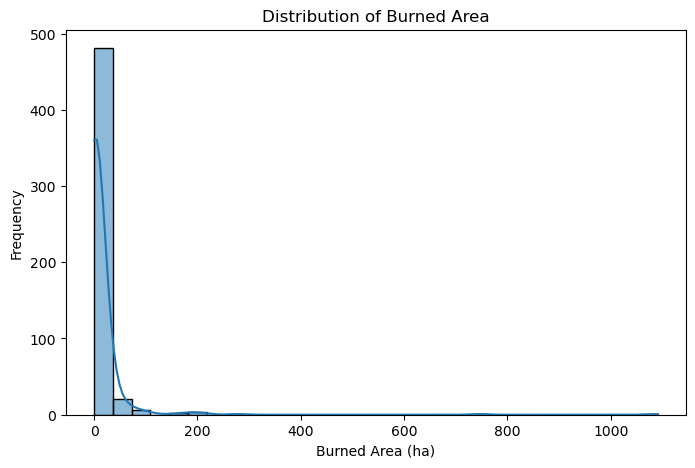

In [31]:
#Exploratory Data Analysis
# Check the distribution of burned area
plt.figure(figsize=(8, 5))
sns.histplot(df["area"], bins=30, kde=True)
plt.xlabel("Burned Area (ha)")
plt.ylabel("Frequency")
plt.title("Distribution of Burned Area")
plt.show()

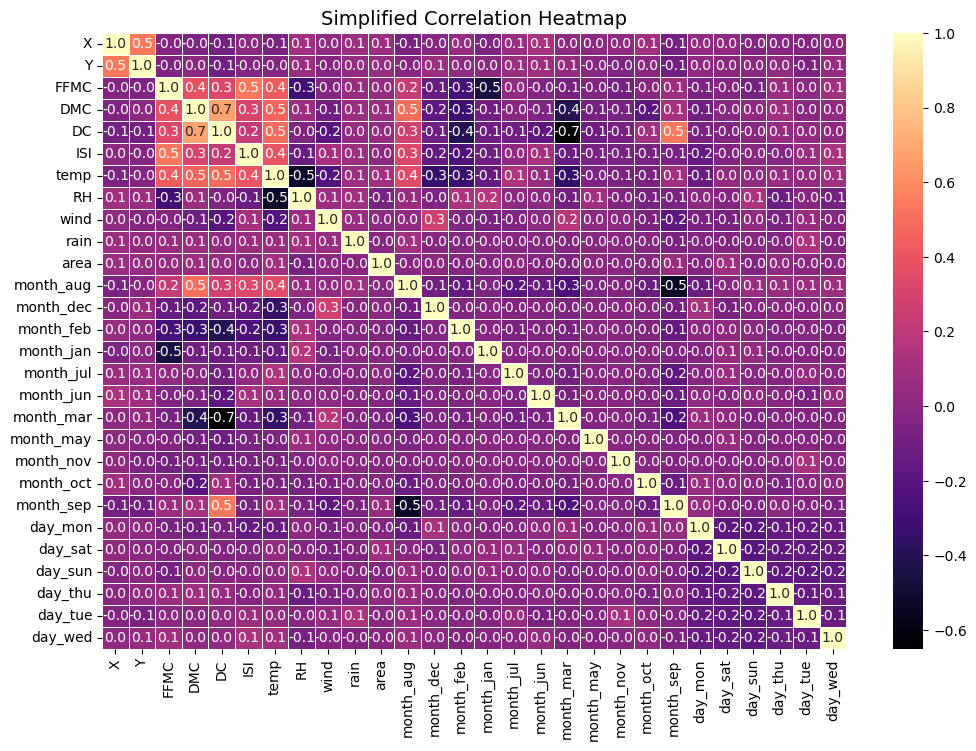

In [47]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt=".1f", linewidths=0.5)
plt.title("Simplified Correlation Heatmap", fontsize=14)
plt.show()

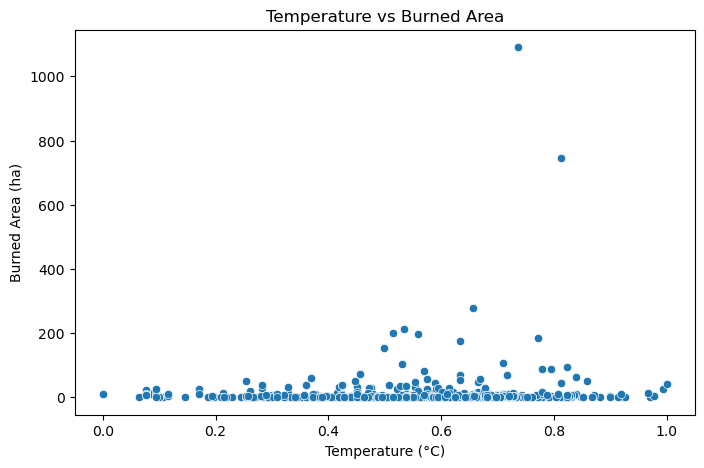

In [57]:
# Scatter plot of Temperature vs Burned Area
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["temp"], y=df["area"])
plt.xlabel("Temperature (°C)")
plt.ylabel("Burned Area (ha)")
plt.title("Temperature vs Burned Area")
plt.show()

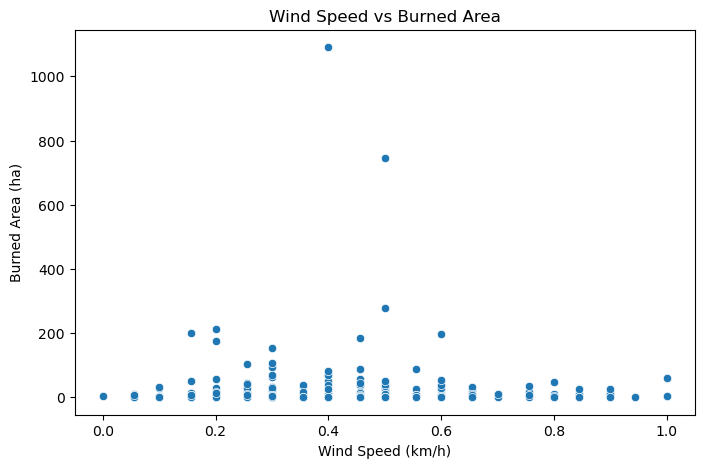

In [59]:
# Scatter plot of Wind vs Burned Area
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["wind"], y=df["area"])
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Burned Area (ha)")
plt.title("Wind Speed vs Burned Area")
plt.show()

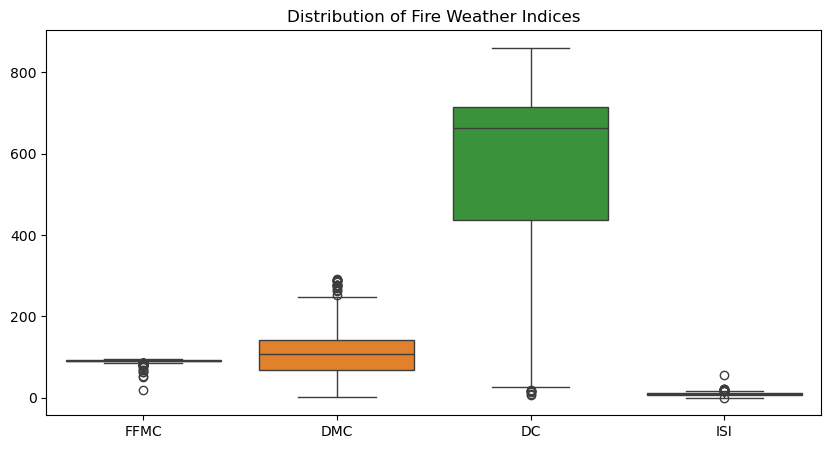

In [65]:
# Boxplot of FWI indices
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["FFMC", "DMC", "DC", "ISI"]])
plt.title("Distribution of Fire Weather Indices")
plt.show()

In [77]:
#Feature Engineering 
num_cols = ["temp", "RH", "wind", "rain", "FFMC", "DMC", "DC", "ISI"]
# Apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

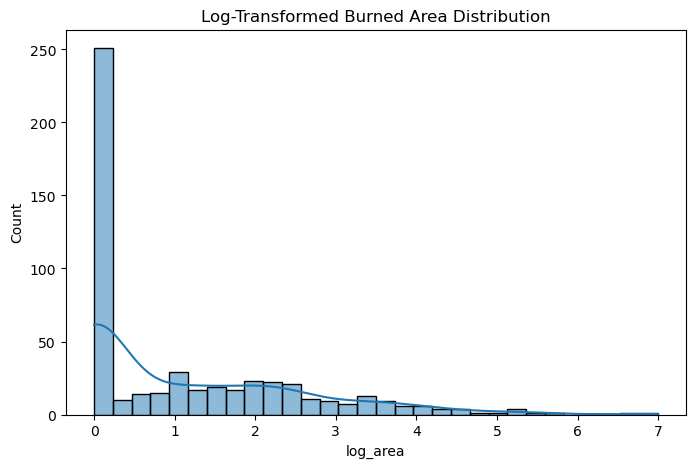

In [81]:
# Apply log transformation (add 1 to avoid log(0))
df["log_area"] = np.log1p(df["area"])
plt.figure(figsize=(8,5))
sns.histplot(df["log_area"], bins=30, kde=True)
plt.title("Log-Transformed Burned Area Distribution")
plt.show()

In [83]:
# Define features (X) and target variable (y)
X = df.drop(columns=["area", "log_area"])  # Drop original target variable
y = df["log_area"]  # Use log-transformed burned area

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Train Set Shape: (413, 27)
Test Set Shape: (104, 27)


In [111]:
# Train the model
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
print(f"Random Forest RMSE: {rmse:.2f}")

Random Forest RMSE: 109.98


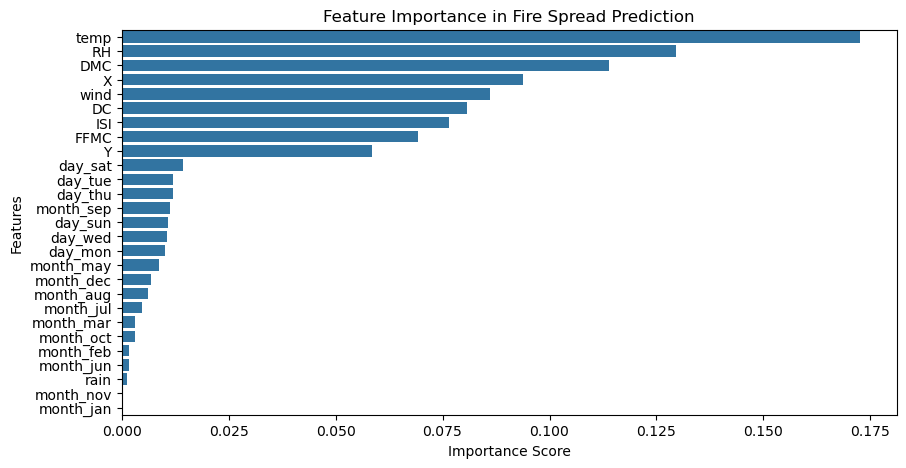

In [89]:
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance in Fire Spread Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

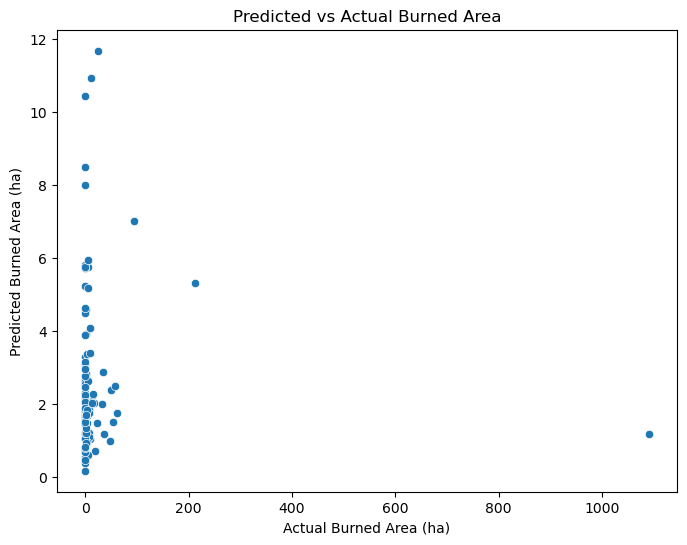

In [91]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual)
plt.xlabel("Actual Burned Area (ha)")
plt.ylabel("Predicted Burned Area (ha)")
plt.title("Predicted vs Actual Burned Area")
plt.show()

In [95]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE: {rmse_lr:.2f}")

Linear Regression RMSE: 1.52
Linear Regression RMSE: 1.52


In [99]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree RMSE: {rmse_dt:.2f}")

Decision Tree RMSE: 1.52


In [107]:
#XGB Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

XGBoost RMSE: 1.59


In [123]:
#Convert 'log_area' into a binary classification target
df["fire_occurred"] = np.where(df["log_area"] > 0, 1, 0)

# Define features and new classification target
X = df.drop(columns=["area", "log_area", "fire_occurred"])  
y = df["fire_occurred"]

In [131]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, df["log_area"], test_size=0.2, random_state=42)

# Train models
lr = LinearRegression().fit(X_train, y_train)
dt = DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42).fit(X_train, y_train)

# Train Logistic Regression (Classification Model)
df["fire_occurred"] = np.where(df["log_area"] > 0, 1, 0)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, df["fire_occurred"], test_size=0.2, random_state=42)
log_reg = LogisticRegression().fit(X_train_clf, y_train_clf)

In [139]:
#  Comparison between all the models
# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Compute RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Print RMSE results
rmse_results = {
    "Linear Regression": rmse_lr,
    "Decision Tree": rmse_dt,
    "Random Forest": rmse_rf,
    "XGBoost": rmse_xgb
}
print("\n RMSE for Regression Models:")
for model, rmse in rmse_results.items():
    print(f"{model}: {rmse:.4f}")


 RMSE for Regression Models:
Linear Regression: 1.5171
Decision Tree: 1.5171
Random Forest: 1.5252
XGBoost: 1.5928


In [141]:
# Convert regression outputs to binary classification
def convert_to_binary(pred):
    return np.where(pred > 0, 1, 0)

y_pred_lr_clf = convert_to_binary(y_pred_lr)
y_pred_dt_clf = convert_to_binary(y_pred_dt)
y_pred_rf_clf = convert_to_binary(y_pred_rf)
y_pred_xgb_clf = convert_to_binary(y_pred_xgb)
y_pred_logreg = log_reg.predict(X_test_clf)

In [147]:
# Accuracy , Precision, Recall, F1-score
# Define function to evaluate classification models
def evaluate_model(y_test, y_pred, name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n {name} Classification Performance:")
    print(f" Accuracy: {accuracy:.2f}")
    print(f" Precision: {precision:.2f}")
    print(f" Recall: {recall:.2f}")
    print(f" F1-score: {f1:.2f}")

# Evaluate each model
evaluate_model(y_test_clf, y_pred_lr_clf, "Linear Regression")
evaluate_model(y_test_clf, y_pred_dt_clf, "Decision Tree Regressor")
evaluate_model(y_test_clf, y_pred_rf_clf, "Random Forest Regressor")
evaluate_model(y_test_clf, y_pred_xgb_clf, "XGBoost Regressor")
evaluate_model(y_test_clf, y_pred_logreg, "Logistic Regression")


 Linear Regression Classification Performance:
 Accuracy: 0.51
 Precision: 0.51
 Recall: 1.00
 F1-score: 0.68

 Decision Tree Regressor Classification Performance:
 Accuracy: 0.51
 Precision: 0.51
 Recall: 1.00
 F1-score: 0.68

 Random Forest Regressor Classification Performance:
 Accuracy: 0.51
 Precision: 0.51
 Recall: 1.00
 F1-score: 0.68

 XGBoost Regressor Classification Performance:
 Accuracy: 0.50
 Precision: 0.50
 Recall: 0.98
 F1-score: 0.67

 Logistic Regression Classification Performance:
 Accuracy: 0.51
 Precision: 0.52
 Recall: 0.57
 F1-score: 0.54
